In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_pickle('./dataset_new.pkl')
data.tail()

,0,1,2,3,4,5,6
14995,"[id, FFEA064F-0D58-4CB8-A42F-F54E90EC0816-1000]","[dates, [2017-04-17, 2017-04-20, 2017-04-27, 2...","[transaction_amount, [[-150.0], [6.52], [6.52]...","[days_before_request, [[62.0], [62.0], [62.0],...","[loan_amount, 1000]","[loan_date, 2017-07-12]",[]
14996,"[id, FFEADE25-11CF-488D-B722-EDF6649A3F52-750]","[dates, [2017-03-07, 2017-03-08, 2017-03-08, 2...","[transaction_amount, [[350.0], [-23.21], [-48....","[days_before_request, [[18.0], [18.0], [18.0],...","[loan_amount, 750]","[loan_date, 2017-06-02]",[]
14997,"[id, FFEC371F-8F61-469D-8B9B-360504AB803A-750]","[dates, [2017-08-21, 2017-08-23, 2017-08-23, 2...","[transaction_amount, [[-108.09], [-10.0], [-12...","[days_before_request, [[75.0], [74.0], [74.0],...","[loan_amount, 750]","[loan_date, 2017-11-16]",[]
14998,"[id, FFF1961C-9082-4EC1-AEAF-0DACD21EF80A-500]","[dates, [2017-05-16, 2017-05-17, 2017-05-18, 2...","[transaction_amount, [[-10.0], [6.03], [-4.2],...","[days_before_request, [[66.0], [66.0], [66.0],...","[loan_amount, 500]","[loan_date, 2017-08-13]",[]
14999,"[id, FFF4FB79-70EA-4E28-9A7A-572BE7E75D42-500]","[dates, [2017-02-09, 2017-02-09, 2017-02-09, 2...","[transaction_amount, [[-8.58], [-40.0], [40.0]...","[days_before_request, [[20.0], [19.0], [19.0],...","[loan_amount, 500]","[loan_date, 2017-05-09]",[]


In [ ]:
print(data.isnull().sum())
print("\n== > There is no null value in the dataset.")

0    0
1    0
2    0
3    0
4    0
5    0
6    0
dtype: int64

== > There is no null value in the dataset.


In [ ]:
cus_id = []
for i in range(10000,15000):
    cus_id.append(data[0][i][1])
cus_id = np.asarray([cus_id]).transpose()

In [ ]:
len_neg = []
mean_neg = []
for i in range (0 , 15000):
    len_neg.append(len(data[2][i][1][np.where(data[2][i][1] <= 0 )]))
    mean_neg.append(np.mean(data[2][i][1][np.where(data[2][i][1] < 0 )]))
len_neg = np.asarray([len_neg]).transpose()
mean_neg = np.asarray([mean_neg]).transpose()

In [ ]:
len_pos = []
mean_pos = []
for i in range (0 , 15000):
    len_pos.append(len(data[2][i][1][np.where(data[2][i][1] >= 0 )]))
    #mean_pos.append(np.mean(data[2][i][1][np.where(data[2][i][1] > 0 )]))
len_pos = np.asarray([len_pos]).transpose()
#mean_pos = np.asarray([mean_pos]).transpose()

In [ ]:
cus_max = []
for i in range(0,15000):
    cus_max.append(np.round(np.max(data[2][i][1])))
cus_max = np.asarray([cus_max]).transpose()

In [ ]:
cus_min = []
for i in range(0,15000):
    cus_min.append(np.round(np.min(data[2][i][1])))
cus_min = np.asarray([cus_min]).transpose()

In [ ]:
cus_mean = []
for i in range(0,15000):
    cus_mean.append(np.mean(data[2][i][1]))
cus_mean = np.asarray([cus_mean]).transpose()

In [ ]:
cus_std = []
for i in range(0,15000):
    cus_std.append(np.std(data[2][i][1]))
cus_std = np.asarray([cus_std]).transpose()

In [ ]:
cus_loan = []
for i in range(0,15000):
    cus_loan.append(data[4][i][1])
cus_loan = np.asarray([cus_loan]).transpose()

In [ ]:
trans_len = []
for i in range(0,15000):
    trans_len.append(len(data[2][i][1]))
trans_len = np.asarray([trans_len]).transpose()

In [ ]:
cus_def = []
for i in range(0,10000):
    cus_def.append(data[6][i][1])
cus_def = np.asarray([cus_def]).transpose()

In [ ]:
#data_arr = np.hstack([len_neg, mean_neg, len_pos, mean_pos, cus_max, cus_min, cus_mean, cus_std, cus_loan, trans_len])
data_arr = np.hstack([len_neg, mean_neg, len_pos, cus_max, cus_min, cus_mean, cus_std, cus_loan, trans_len])
print(data_arr.shape)
def_arr = np.hstack([cus_def])
print(def_arr.shape)

(15000, 9)
(10000, 1)


In [ ]:
# combine all features into one dataframe
#columns = ["len_neg", "mean_neg", "len_pos", "mean_pos", "max", "min", "mean", "std", "loan", "trans_len"]
columns = ["len_neg", "mean_neg", "len_pos", "max", "min", "mean", "std", "loan", "trans_len"]
df = pd.DataFrame(data = data_arr, columns = columns)
df_label = pd.DataFrame(data = def_arr, columns = ["isDef"])
df.head()

,len_neg,mean_neg,len_pos,max,min,mean,std,loan,trans_len
0,171.0,-78.789942,29.0,3083.0,-562.0,-3.557400,340.472322,750.0,200.0
1,282.0,-59.946844,100.0,1507.0,-1507.0,2.387382,263.269515,500.0,382.0
2,222.0,-56.448514,14.0,1639.0,-811.0,1.553517,292.152049,1000.0,236.0
3,200.0,-46.844850,49.0,1000.0,-900.0,1.335502,193.172187,250.0,249.0
4,227.0,-22.771498,13.0,806.0,-320.0,-1.189833,119.056949,500.0,240.0


In [ ]:
X_test_real = df[10000:15000]
X_test_real.head()

,len_neg,mean_neg,len_pos,max,min,mean,std,loan,trans_len
10000,131.0,-146.049771,21.0,3809.0,-1000.0,1.114934,619.190774,500.0,152.0
10001,193.0,-70.593005,16.0,1729.0,-880.0,-1.277656,301.202184,500.0,209.0
10002,366.0,-26.112869,33.0,1015.0,-900.0,-1.301378,156.077809,750.0,399.0
10003,222.0,-79.889640,16.0,1856.0,-700.0,-7.238571,345.536979,600.0,238.0
10004,294.0,-31.672959,19.0,1488.0,-500.0,3.762652,218.452822,700.0,313.0


In [ ]:
df = df[0:10000]
df['isDef'] = df_label
df.head()

,len_neg,mean_neg,len_pos,max,min,mean,std,loan,trans_len,isDef
0,171.0,-78.789942,29.0,3083.0,-562.0,-3.557400,340.472322,750.0,200.0,1
1,282.0,-59.946844,100.0,1507.0,-1507.0,2.387382,263.269515,500.0,382.0,1
2,222.0,-56.448514,14.0,1639.0,-811.0,1.553517,292.152049,1000.0,236.0,0
3,200.0,-46.844850,49.0,1000.0,-900.0,1.335502,193.172187,250.0,249.0,0
4,227.0,-22.771498,13.0,806.0,-320.0,-1.189833,119.056949,500.0,240.0,0


In [ ]:
#x = df[["len_neg", "mean_neg", "len_pos", "mean_pos", "max", "min", "mean", "std", "loan", "trans_len"]]
x = df[["len_neg", "mean_neg", "len_pos", "max", "min", "mean", "std", "loan", "trans_len"]]
y = df ["isDef"]

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 5)

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import accuracy_score


clf = SVC(probability = True)
clf.fit(X_train , y_train)
ypred = clf.predict(X_test)
probs = clf.predict_proba(X_test)
fpr , tpr , thresh = roc_curve(y_test, probs[:,1])

# Predicting the Test set results
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)*100
print('Accuracy of SVM is equal ' + str(round(accuracy, 2)) + ' %.')
print("auc of SVM = " ,auc(fpr,tpr))

//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Accuracy of SVM is equal 73.3 %.
auc of SVM =  0.5079275982892509


In [ ]:
# make probability predictions with the model
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_curve, auc
#Create a GradientBoostingClassifier Classifier
clf = GradientBoostingClassifier(n_estimators = 50)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy of GradientBoostingClassifier :", metrics.accuracy_score(y_test, y_pred))

probs = clf.predict_proba(X_test)
fpr , tpr , thresh = roc_curve(y_test, probs[:,1])
print("auc of GB = " ,auc(fpr,tpr))

Accuracy of GradientBoostingClassifier : 0.7385
auc of GB =  0.7138563560636496


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

# Instantiate learning model (k = 3)
clf = KNeighborsClassifier(n_neighbors=3)

# Fitting the model
clf.fit(X_train, y_train)

# Predicting the Test set results
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)*100
print('Accuracy of our model is equal ' + str(round(accuracy, 2)) + ' %.')


probs = clf.predict_proba(X_test)
fpr , tpr , thresh = roc_curve(y_test, probs[:,1])
print("auc of KNN = " ,auc(fpr,tpr))

Accuracy of our model is equal 67.9 %.
auc of KNN =  0.5678877282736385


In [ ]:
# creating list of K for KNN
k_list = list(range(1,50,2))
# creating list of cv scores
cv_scores_knn = []

# perform 10-fold cross validation
for k in k_list:
    knn = KNeighborsClassifier(n_neighbors = k)
    scores = cross_val_score(knn, X_train, y_train, cv = 10, scoring = 'accuracy')
    cv_scores_knn.append(scores.mean())

print("The max cross valitation score is ", np.max(cv_scores_knn))

The max cross valitation score is  0.7287506123056442


<Figure size 432x288 with 0 Axes>

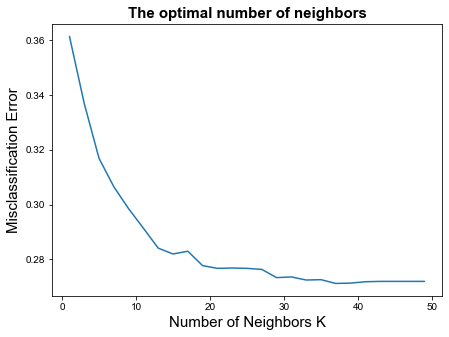

In [ ]:
import seaborn as sns
# changing to misclassification error
MSE = [1 - x for x in cv_scores_knn]

plt.figure()
plt.figure(figsize = (7,5))
plt.title('The optimal number of neighbors', fontsize = 15, fontweight = 'bold')
plt.xlabel('Number of Neighbors K', fontsize = 15)
plt.ylabel('Misclassification Error', fontsize = 15)
sns.set_style("whitegrid")
plt.plot(k_list, MSE)

plt.show()

In [ ]:
# finding best k
best_k = k_list[MSE.index(min(MSE))]
print("The optimal number of neighbors is %d." % best_k)

The optimal number of neighbors is 37.


In [ ]:
# when k = best_k, test model 
clf = KNeighborsClassifier(n_neighbors = best_k)

# Fitting the model
clf.fit(X_train, y_train)

# Predicting the Test set results
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)*100
print('Accuracy of tunned model is when k = '+ str(best_k) +' is :'+ str(round(accuracy, 2)) + ' %.')

# auc 

probs = clf.predict_proba(X_test)
fpr , tpr , thresh = roc_curve(y_test, probs[:,1])
print("auc of tunned KNN = " ,auc(fpr,tpr))

Accuracy of tunned model is when k = 37 is :72.8 %.
auc of tunned KNN =  0.6172859910801011


In [ ]:
# Using random forest

#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators = 100)

# fitting the model
clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)


# Predicting the Test set results
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)*100
print('Accuracy of our model is equal ' + str(round(accuracy, 2)) + ' %.')


probs = clf.predict_proba(X_test)
fpr , tpr , thresh = roc_curve(y_test, probs[:,1])
print("auc of RF = " ,auc(fpr,tpr))

Accuracy of our model is equal 73.15 %.
auc of RF =  0.6786325449173358


In [ ]:
from sklearn.tree import DecisionTreeClassifier
# Using Decision Tree


clf = DecisionTreeClassifier()

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

# Predicting the Test set results
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)*100
print('Accuracy of our model is equal ' + str(round(accuracy, 2)) + ' %.')


probs = clf.predict_proba(X_test)
fpr , tpr , thresh = roc_curve(y_test, probs[:,1])
print("auc of DT = " ,auc(fpr,tpr))

Accuracy of our model is equal 62.85 %.
auc of DT =  0.5416372133706945


In [ ]:
def p_value(p): 
    alpha = 0.05
    if p <= alpha :
        print("we reject the null hypothesis that there's no difference between "+ str(clf1 )+" and "+str(clf2) +" classifier ")
    elif p > alpha :
        print("we cannot conclude that a significant difference between "+str (clf1)+ " and "+ str(clf2)+ " exists ")

In [ ]:
from mlxtend.evaluate import paired_ttest_5x2cv
clf1 = KNeighborsClassifier(n_neighbors = best_k)
clf2 = GradientBoostingClassifier( )


t, p = paired_ttest_5x2cv(estimator1=clf1,
                          estimator2=clf2,
                          X=X_train, y=y_train,
                          random_seed=1)

print('t statistic: %.3f' % t)
print('p value: %.3f' % p)
p_value(p)

t statistic: -1.553
p value: 0.181
we cannot conclude that a significant difference between KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=37, p=2,
                     weights='uniform') and GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False) exists 


In [ ]:
from mlxtend.evaluate import paired_ttest_5x2cv
clf1 = GradientBoostingClassifier()
clf2 = RandomForestClassifier()

t, p = paired_ttest_5x2cv(estimator1=clf1,
                          estimator2=clf2,
                          X=X_train, y=y_train,
                          random_seed=1)

print('t statistic: %.3f' % t)
print('p value: %.3f' % p)
p_value(p)

//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


t statistic: 3.058
p value: 0.028
we reject the null hypothesis that there's no difference between GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False) and RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_s

In [ ]:
# using our best model " GB " to predict the probabilities for 5000 customers

# make probability predictions with the model
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_curve, auc
#Create a GradientBoostingClassifier Classifier
clf = GradientBoostingClassifier(n_estimators = 50)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train, y_train)

y_pred_ = clf.predict(X_test)

from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy of GradientBoostingClassifier :", metrics.accuracy_score(y_test, y_pred))

probs_ = clf.predict_proba(X_test_real)[:,1]


Accuracy of GradientBoostingClassifier : 0.7385


Text(0.5, 1, 'feature importance in GradientBoostingClassifier')

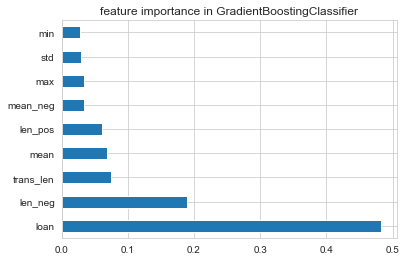

In [ ]:
# feature importance 
(pd.Series(clf.feature_importances_, index=x.columns)
   .nlargest(9)
   .plot(kind='barh'))
plt.savefig("feature_importance_.png")
plt.title("feature importance in GradientBoostingClassifier")

In [ ]:
# potential customers 

isPay_thresh = 0.15 # isDef = 0 payback
notPay_thresh = 0.95 # isDef = 1 notPayBack
clf = GradientBoostingClassifier(n_estimators = 50)

y_pred = clf.fit(X_train, y_train).predict(X_test_real)


In [ ]:
print(np.sum(y_pred < isPay_thresh)) # safe people
print(np.sum(y_pred > notPay_thresh)) # dangerous people 

print(y_pred.shape)

4845
155
(5000,)


In [ ]:
# saving our result probabilities prediction for 5000 customers
id_ = pd.DataFrame( data = cus_id)
pre = pd.DataFrame( data = probs_)

In [ ]:
frames = [id_ , pre]
ff = pd.concat( frames , axis=1)

In [ ]:
ff.to_csv('output.txt', sep=',', header = False)

In [ ]:
data = pd.read_csv('output.txt', header = None)

In [ ]:
data.head()

,0,1,2
0,0,A9C3F4CA-66BF-44EE-8C38-1C50D0751CD1-500,0.363143
1,1,A9C93D6B-8625-48EE-9E05-EB63256DEEA6-500,0.318777
2,2,A9D12F62-35D5-44DE-8446-B8C2E4A5E938-750,0.211661
3,3,A9D3EC9F-B3EB-4A56-8BC6-4614A1C42FE2-600,0.265929
4,4,A9D54EF9-3CBA-4481-80B2-59FD92BB60D9-700,0.253342


In [ ]:
# testing with nn 
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras import optimizers
from keras.regularizers import l2, l1

Using TensorFlow backend.


In [ ]:
model = Sequential()
model.add(Dense(16, input_dim=9, activation='relu', kernel_regularizer=l1(0.01))) # kernel_regularizer=l1(0.001)
model.add(Dropout(0.1))
model.add(Dense(32, activation='relu'))
model.add(Dense(64, activation = 'relu'))
#model.add(Dense(64, activation = 'relu'))
#model.add(Dropout(0.5))
#model.add(Dense(16, activation='relu'))
#model.add(Dense(15 , activation = 'relu'))
#model.add(Dropout(0.2))
#model.add(Dense(7, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
optim = optimizers.SGD(lr=0.004, momentum=0.9, decay=0.0, nesterov=False)

In [ ]:
# compile the keras model
model.compile(loss='binary_crossentropy', optimizer= optim, metrics=['accuracy'])

In [ ]:
# fit the keras model on the dataset
n_epochs = 20
model.fit(X_train, y_train, epochs = n_epochs , batch_size=16)

Epoch 1/20
8000/8000 [==============================] - 1s 86us/step - loss: 389.1719 - accuracy: 0.7189
Epoch 2/20
8000/8000 [==============================] - 0s 44us/step - loss: 325.4372 - accuracy: 0.7297
Epoch 3/20
8000/8000 [==============================] - 0s 48us/step - loss: 325.3681 - accuracy: 0.7297
Epoch 4/20
8000/8000 [==============================] - 0s 44us/step - loss: 325.1240 - accuracy: 0.7297
Epoch 5/20
8000/8000 [==============================] - 0s 44us/step - loss: 324.8837 - accuracy: 0.7297
Epoch 6/20
8000/8000 [==============================] - 0s 50us/step - loss: 324.6472 - accuracy: 0.7297
Epoch 7/20
8000/8000 [==============================] - 0s 60us/step - loss: 324.4176 - accuracy: 0.7297
Epoch 8/20
8000/8000 [==============================] - 0s 45us/step - loss: 324.1903 - accuracy: 0.7297
Epoch 9/20
8000/8000 [==============================] - 0s 49us/step - loss: 323.9636 - accuracy: 0.7297
Epoch 10/20
8000/8000 [==============================] 

In [ ]:
# evaluate the keras model
_, accuracy = model.evaluate(X_test, y_test)
print('Accuracy: %.2f' % (accuracy*100))

2000/2000 [==============================] - 0s 31us/step
Accuracy: 73.10


In [ ]:
# confidence interval for accuracy = 73% and success_rate = 95%
from statsmodels.stats.proportion import proportion_confint
lower, upper = proportion_confint(73, 100, 0.05)
print('lower=%.3f, upper=%.3f' % (lower, upper))

lower=0.643, upper=0.817
